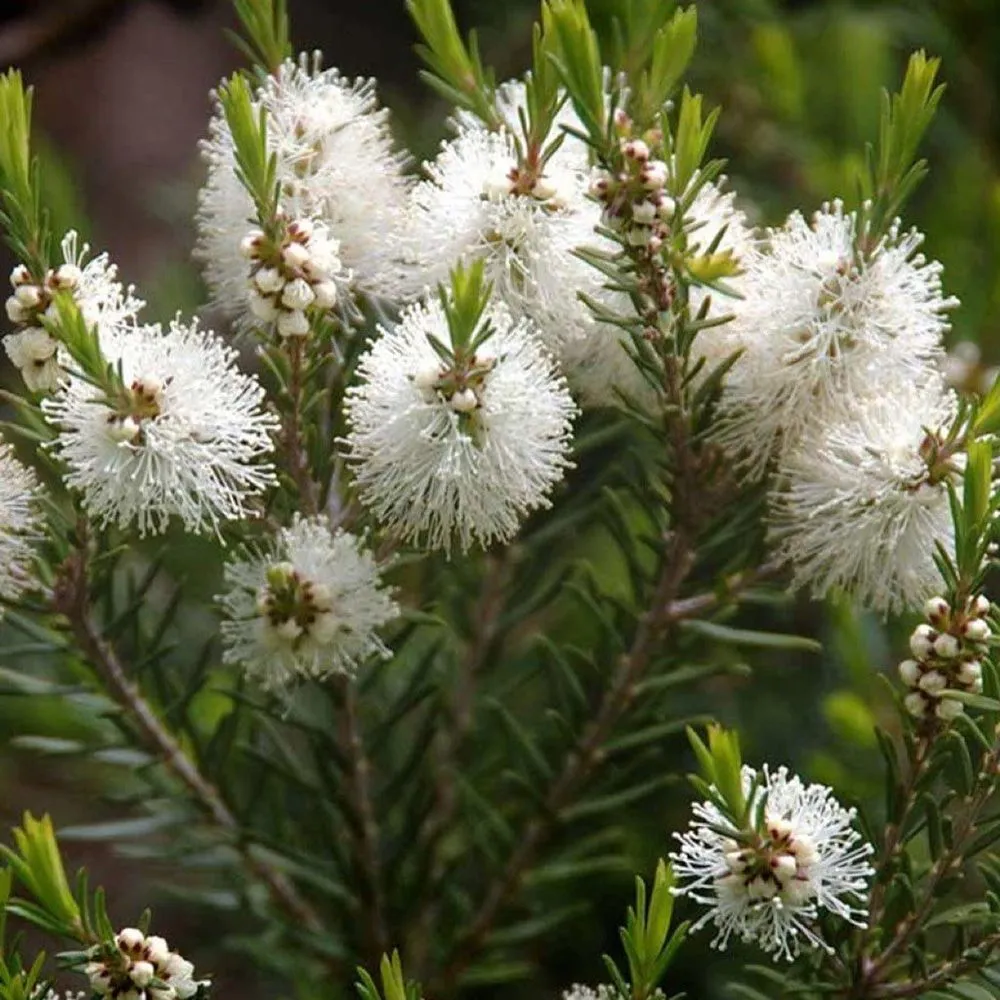

In [29]:
from IPython.display import Image

url = r"C:\Users\mayur\Downloads\Tea Tree Oil.webp"
Image(filename=url, height=300, width=400)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\mayur\Downloads\archive (12)\avocado.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [3]:
data.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


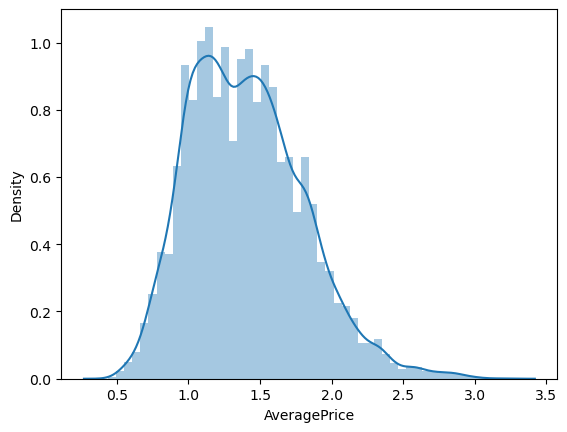

In [4]:
sns.distplot(data['AveragePrice']);

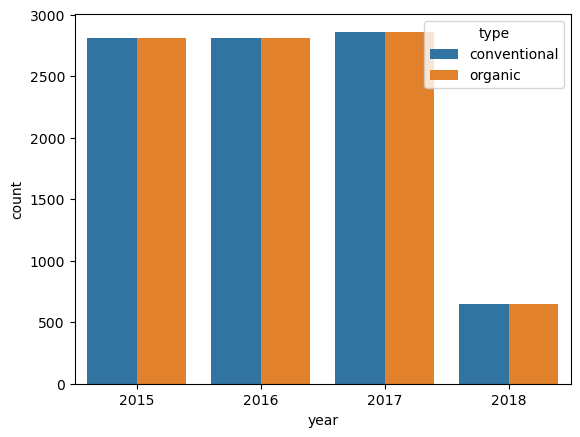

In [5]:
sns.countplot(x='year', data=data,hue='type');

In [6]:
data.year.value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

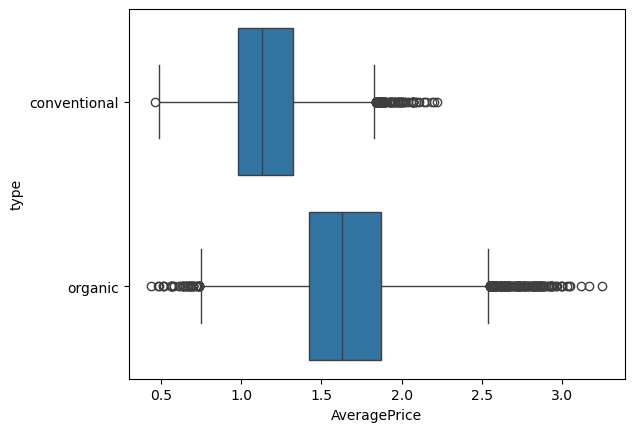

In [7]:
sns.boxplot(y="type", x="AveragePrice", data=data);

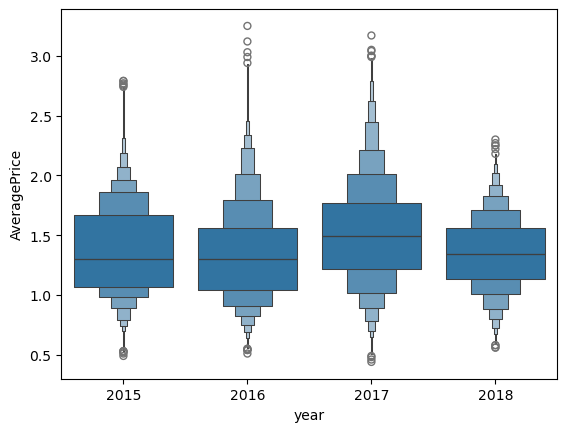

In [8]:
data.year=data.year.apply(str)
sns.boxenplot(x="year", y="AveragePrice", data=data);

In [9]:
data['type']= data['type'].map({'conventional':0,'organic':1})

data.Date = data.Date.apply(pd.to_datetime)
data['Month']=data['Date'].apply(lambda x:x.month)
data.drop('Date',axis=1,inplace=True)
data.Month = data.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

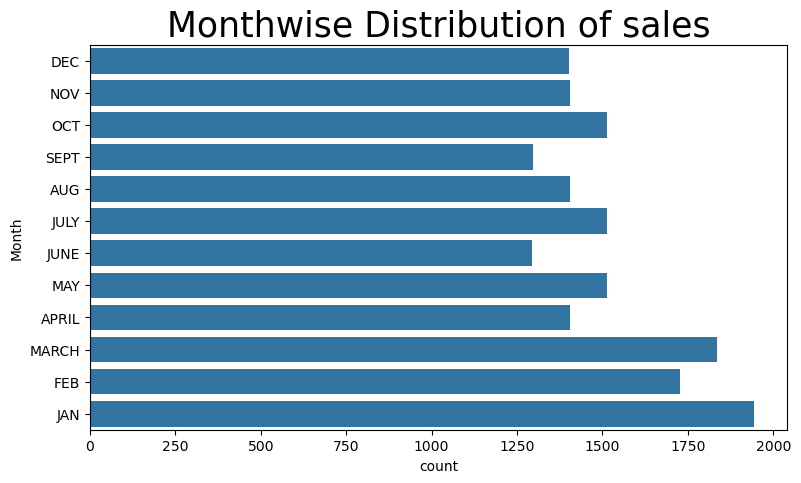

In [10]:
plt.figure(figsize=(9,5))
sns.countplot(data['Month'])
plt.title('Monthwise Distribution of sales', fontdict={'fontsize':25});

In [11]:
dummies = pd.get_dummies(data[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([data[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = data['AveragePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [12]:
!pip install xgboost


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [14]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

In [15]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [16]:
# Splitting train set into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20)

#importing tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#creating model
model = Sequential()
model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [17]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=100,
    epochs=150,
    callbacks=[early_stop]
)


Epoch 1/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2760 - val_loss: 0.0818
Epoch 2/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1117 - val_loss: 0.0685
Epoch 3/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0978 - val_loss: 0.0538
Epoch 4/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0865 - val_loss: 0.0523
Epoch 5/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0773 - val_loss: 0.0458
Epoch 6/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0724 - val_loss: 0.0429
Epoch 7/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0658 - val_loss: 0.0416
Epoch 8/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0616 - val_loss: 0.0403
Epoch 9/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0578 - val_loss: 0.0382
Epoch 10/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0555 - val_loss: 0.0334
Epoch 11/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0541 - val_loss: 0.0358
Epoch 12/150
103/103 ━━━━━━━━━━━━━━━━━━━━

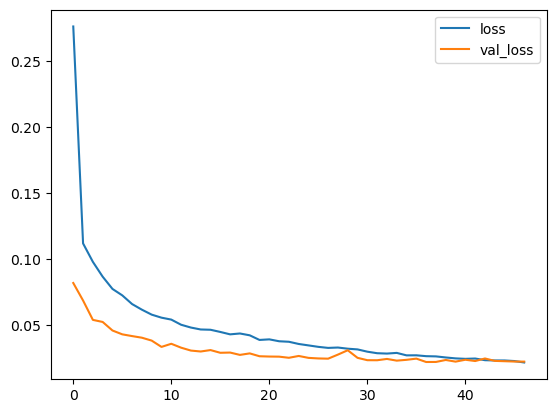

In [18]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();


In [20]:
dnn_pred = model.predict(X_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
results.loc['Deep Neural Network'] = [
    round(mean_absolute_error(y_test, dnn_pred), 3),
    round(mean_squared_error(y_test, dnn_pred), 3),
    round(r2_score(y_test, dnn_pred), 3)
]

results


,MAE,MSE,R2-score
Linear Regression,0.184,0.060,0.639
Decision Tree,0.131,0.040,0.760
Random Forest,0.096,0.019,0.886
Support Vector Machines,0.119,0.029,0.823
K-nearest Neighbors,0.100,0.025,0.849
XGBoost,0.094,0.017,0.896
Deep Neural Network,0.110,0.024,0.857


In [24]:
f"10% of mean of target variable is {np.round(0.1 * data.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

In [25]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGBoost,0.094000,0.017000,0.896000
Random Forest,0.096000,0.019000,0.886000
Deep Neural Network,0.110000,0.024000,0.857000
K-nearest Neighbors,0.100000,0.025000,0.849000
Support Vector Machines,0.119000,0.029000,0.823000
Decision Tree,0.131000,0.040000,0.760000
Linear Regression,0.184000,0.060000,0.639000
